In [1]:
from matplotlib.pylab import *
from jax import lax, random, numpy as jnp
from flax import linen as nn
from matplotlib.pylab import *
from jax import lax, random, numpy as jnp
from flax import linen as nn
import numpy as np
from typing import Any, Callable, Optional, Tuple, Type, List
from jax import lax, random, numpy as jnp
import einops

import optax
from flax.training import train_state  # Useful dataclass to keep train state

import h5py
import jax

/opt/conda/lib/python3.10/site-packages/flax/core/frozen_dict.py:169: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(


In [2]:
import imageio.v3 as iio

im = iio.imread('imageio:chelsea.png')
im.shape

(300, 451, 3)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


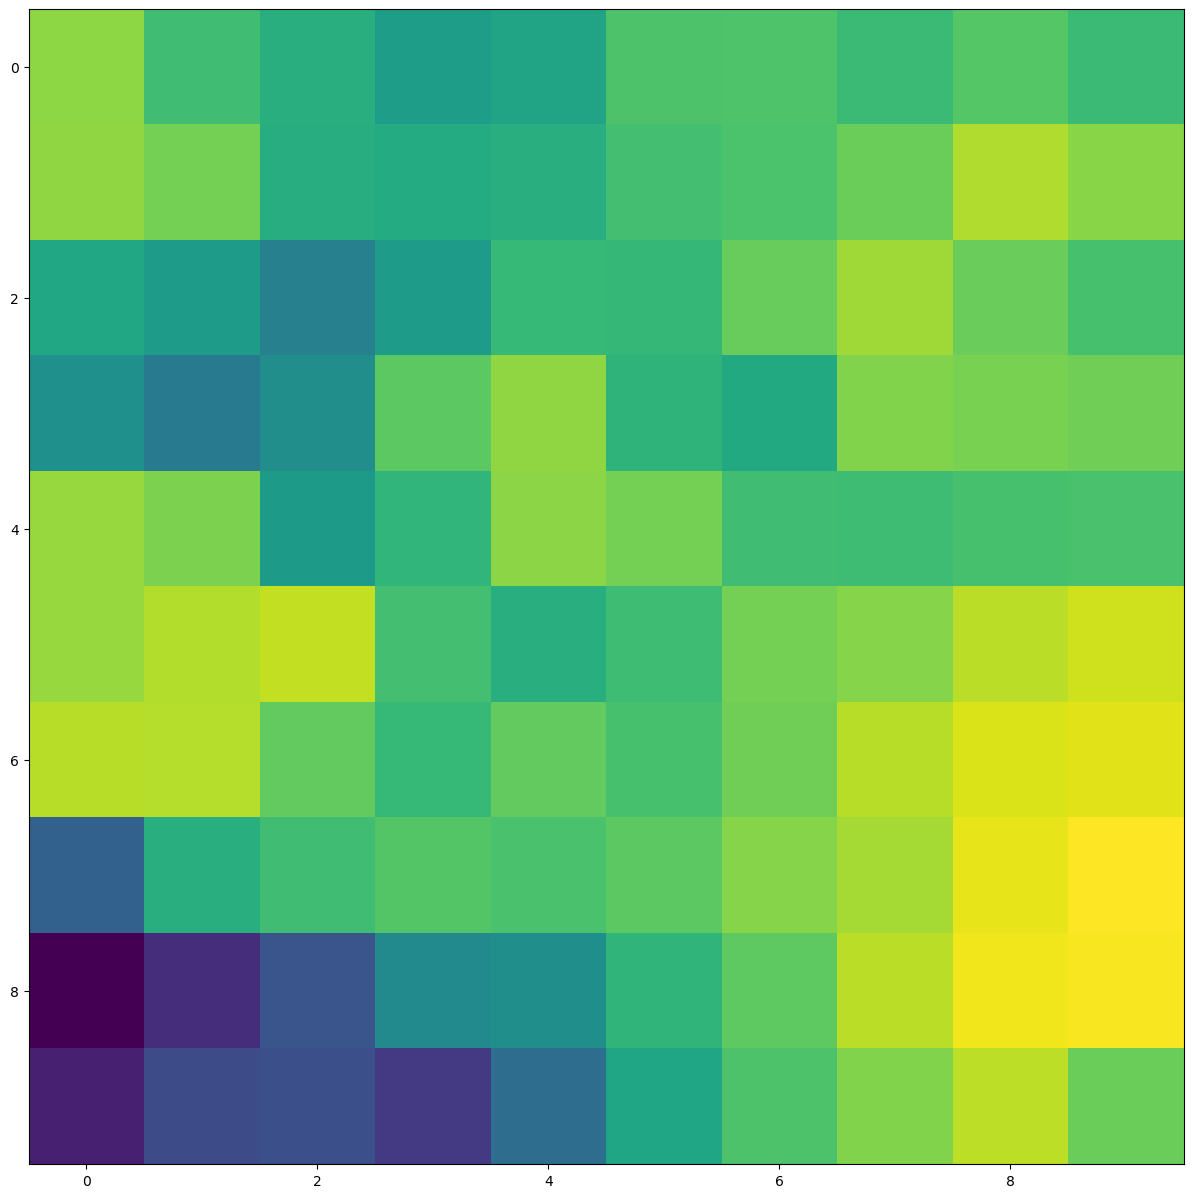

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import jax
im = iio.imread('imageio:chelsea.png')

plt.figure(figsize=(15, 15))
# plt.set_cmap("gray")
im=jnp.round(jax.image.resize(im, (100,100,3), "linear")).astype(int)
im = jnp.mean(im,axis=-1)
plt.imshow(im[20:30,20:30])
plt.show()

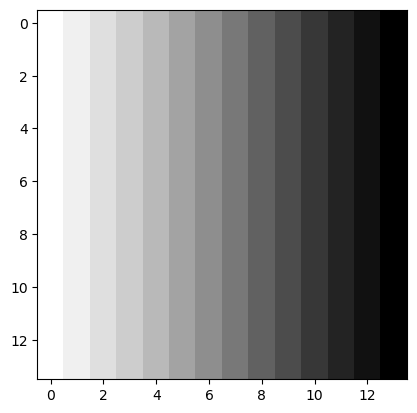

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-7, 7, 1)
X, Y,Z = np.meshgrid(x, x,x)
wavelength = 50
alpha = np.pi*1.5
beta = np.pi*1.5

grating = np.sin(
    2*np.pi*(X*np.cos(alpha)*np.cos(beta) + Y*np.sin(alpha)*np.cos(beta) +Z*np.sin(beta)) / wavelength
)
plt.set_cmap("gray")
plt.imshow(grating[:,5,:])
plt.show()

In [5]:
class Sinusoidal_grating_3d(nn.Module):
        """
        
        """

        @nn.compact
        def __call__(self,sv_area_ids: jnp.ndarray,sv_id: jnp.ndarray,image_part: jnp.ndarray) -> jnp.ndarray:

        # 
        params_grating = self.param('params_grating',
                nn.initializers.lecun_normal(),(1,1))

        wavelength = 50
        alpha = np.pi*1.5
        beta = np.pi*1.5

        grating = np.sin(
        2*np.pi*(X*np.cos(alpha)*np.cos(beta) + Y*np.sin(alpha)*np.cos(beta) +Z*np.sin(beta)) / wavelength
        )

        return generated_texture_single
                # generated_texture_single = self.param('shape_param_single_s_vox',
        #         self.kernel_init,(self.diameter))


v_Texture_sv=nn.vmap(Texture_sv
                            ,in_axes=(0, 0,0)
                            ,variable_axes={'params': None} #parametters are shared
                            ,split_rngs={'params': True,'texture' :True}
                            )

NameError: name 'ml_collections' is not defined